In [18]:
import pandas as pd
filename="/content/drive/MyDrive/MasterFile_prevBatch_Label_v1.xlsx"

# filename= "MasterFile_prevBatch_Label_v1.xlsx"
df = pd.read_excel(filename)
print(df.columns.tolist())

['Unnamed: 0', 'text', 'tokenized_text', 'prediction']


In [ ]:
column_name = 'tokenized_text'
print(df[column_name].dtypes)
print(df[column_name].describe())

object
count     147545
unique    121604
top           []
freq        5850
Name: tokenized_text, dtype: object


In [2]:
!pip install plotly


In [3]:
!pip install --upgrade seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


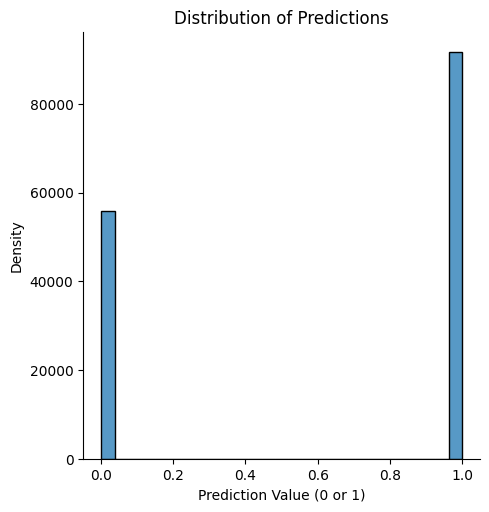

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

predictions = df['prediction']
sns.displot(predictions)
plt.xlabel("Prediction Value (0 or 1)")
plt.ylabel("Density")
plt.title("Distribution of Predictions")
plt.show()



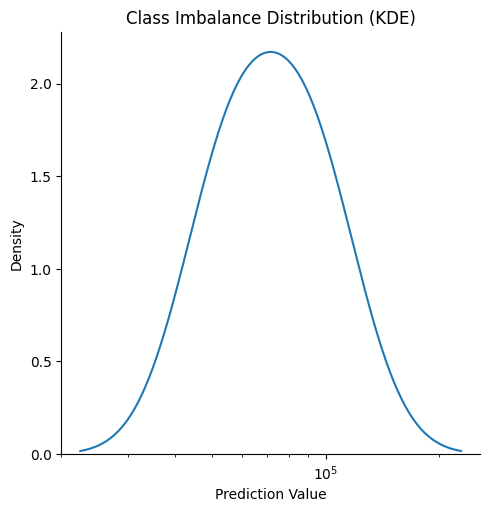

In [ ]:
import pandas as pd
import seaborn as sns

prediction_counts = df['prediction'].value_counts()

sns.displot(prediction_counts, kind="kde", log_scale=True)  # Kernel density estimation with log scale
plt.xlabel("Prediction Value")
plt.ylabel("Density")
plt.title("Class Imbalance Distribution (KDE)")
plt.show()


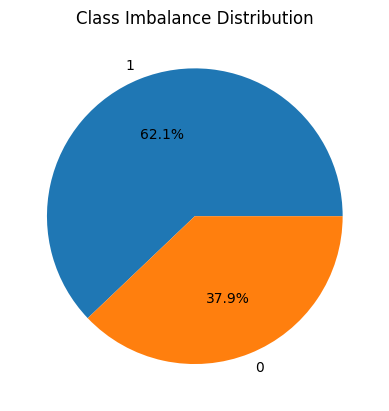

In [ ]:

prediction_counts = df['prediction'].value_counts().sort_values(ascending=False)

plt.pie(prediction_counts.values, labels=prediction_counts.index, autopct="%1.1f%%")
plt.title("Class Imbalance Distribution")
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd

word_counts = df['tokenized_text'].explode().value_counts()

sns.barplot(x=word_counts.values , y=word_counts.index, palette="Blues")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.show()


In [4]:
import pandas as pd
import numpy as np
import nltk
import csv
import string
import re
from nltk import word_tokenize
import itertools
import collections
import codecs
import requests
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
tweets = df.loc[:,"text"]
tweets

0         @RehamKhan1 @MirzaBilal__ آپ نے بہت اچھا کیا ر...
1         @SadiaSa55 @DreamBi11496535 @Naya__Pk @MDaslam...
2         @glfamk دل وچ اوہنے کی رہنا ؟\nکدرے ٹک کی بہین...
3         @MWLorg_Ur اسسلام و علیکم۔ بیشک یہ پیغام جائز ...
4         @MusarratCheema پچھلے چار روز سے ٹھٹھرتی سردی ...
                                ...                        
147540    غیرت مند طالبات نے شہباز گل کے بھائی کو نشان ع...
147541    محترمہ @MaryamNSharif نے وزارت اعلی سنبھالنے ک...
147542      @Tahirmughalpml8 یہی چراغ جلیں گے تو روشنی ہوگی
147543         نواز شریف کی طاقت 💛❤ https://t.co/8AqfGjAfDD
147544    @Tahirmughalpml8 عمران نیازی کو رینجرز نہ اٹھا...
Name: text, Length: 147545, dtype: object

In [9]:
# Define an array for the filtered tweets list
filteredTweets = []

for tweet in tweets:
  tweet = str(tweet)
  # Replace the specific part of the string based on pattern
  replacedText = re.sub('@[a-zA-Z0-9_.-]*', '@USER', tweet)
  # uncomment the next line if you want to totally remove usermentions
  #replacedText = re.sub('@USER:', '', replacedText)
  # Print the original tweet
  print("Original Text:", tweet)
  # Print the replaced tweet
  print("\nReplaced Text:", replacedText)
  # Adding the replaced tweet to the filtered tweet list
  filteredTweets.append(replacedText)

Streaming output truncated to the last 5000 lines.
ملزمان کے قبضہ سے موٹر سائیکل, 4 موبائل فونز ،غیر قانونی اسلحہ اور نقد رقم برآمد۔ 
متحرک ڈکیت کی گرفتاری پر بادامی باغ پولیس ٹیم کو شاباش ,سی سی پی او لاہور https://t.co/0lwvKmIIYE

Replaced Text: بادامی باغ پولیس کی کاروائی , دو رکنی متحرک ڈکیت گینگ گرفتار .
ملزمان کے قبضہ سے موٹر سائیکل, 4 موبائل فونز ،غیر قانونی اسلحہ اور نقد رقم برآمد۔ 
متحرک ڈکیت کی گرفتاری پر بادامی باغ پولیس ٹیم کو شاباش ,سی سی پی او لاہور https://t.co/0lwvKmIIYE
Original Text: ملت پارک پولیس کی کارروائی ، بدنام زمانہ 02 شراب فروش وسیم عرف چھوٹا کالی اور فیروز عرف فوجی گرفتار۔
شراب فروش ملزمان کے قبضہ سے 135 لٹر شراب ، خام مال و دیگر سامان برآمد https://t.co/KW7iDLccbp

Replaced Text: ملت پارک پولیس کی کارروائی ، بدنام زمانہ 02 شراب فروش وسیم عرف چھوٹا کالی اور فیروز عرف فوجی گرفتار۔
شراب فروش ملزمان کے قبضہ سے 135 لٹر شراب ، خام مال و دیگر سامان برآمد https://t.co/KW7iDLccbp
Original Text: السلام علیکم! صبح بخیر
برفباری اور بارش کے دوران احتیاطی تدابیر اپنائیں۔

In [10]:
# removing RT
# Define an array for the tweets without RT character list
filteredCleanedTweet = []

for tweet in filteredTweets:
  tweet = str(tweet)
  # Replace the specific part of the string based on pattern
  replacedText = re.sub('RT', '', tweet)
  # Print the original tweet
  print("Original Text:", tweet)
  # Print the replaced tweet
  print("\nReplaced Text:", replacedText)
  # Adding the replaced tweet to the filtered tweet list
  filteredCleanedTweet.append(replacedText)

Streaming output truncated to the last 5000 lines.
ملزمان کے قبضہ سے موٹر سائیکل, 4 موبائل فونز ،غیر قانونی اسلحہ اور نقد رقم برآمد۔ 
متحرک ڈکیت کی گرفتاری پر بادامی باغ پولیس ٹیم کو شاباش ,سی سی پی او لاہور https://t.co/0lwvKmIIYE

Replaced Text: بادامی باغ پولیس کی کاروائی , دو رکنی متحرک ڈکیت گینگ گرفتار .
ملزمان کے قبضہ سے موٹر سائیکل, 4 موبائل فونز ،غیر قانونی اسلحہ اور نقد رقم برآمد۔ 
متحرک ڈکیت کی گرفتاری پر بادامی باغ پولیس ٹیم کو شاباش ,سی سی پی او لاہور https://t.co/0lwvKmIIYE
Original Text: ملت پارک پولیس کی کارروائی ، بدنام زمانہ 02 شراب فروش وسیم عرف چھوٹا کالی اور فیروز عرف فوجی گرفتار۔
شراب فروش ملزمان کے قبضہ سے 135 لٹر شراب ، خام مال و دیگر سامان برآمد https://t.co/KW7iDLccbp

Replaced Text: ملت پارک پولیس کی کارروائی ، بدنام زمانہ 02 شراب فروش وسیم عرف چھوٹا کالی اور فیروز عرف فوجی گرفتار۔
شراب فروش ملزمان کے قبضہ سے 135 لٹر شراب ، خام مال و دیگر سامان برآمد https://t.co/KW7iDLccbp
Original Text: السلام علیکم! صبح بخیر
برفباری اور بارش کے دوران احتیاطی تدابیر اپنائیں۔

In [ ]:
filteredCleanedTweet

In [11]:
# removing the newline character "\n"

filteredCleanedLineTweet = []

for tweet in filteredCleanedTweet:
  tweet = str(tweet)
  # Remove new line character
  replacedText = re.sub('\n', ' ', tweet)
  # Adding the replaced tweet to the filtered tweet list
  filteredCleanedLineTweet.append(replacedText)

filteredCleanedLineTweet

['@USER @USER آپ نے بہت اچھا کیا روکی فیکٹری پر دے چلو ۔۔مہربانی کرو پر بند نہیں کرنا۔۔۔۔۔شہباز کتے کی وجہ سے پاکستان میں پورا فیکٹری بند۔۔۔اور ایک آپ ہو پورانہ فیکٹری پر چلو کیا 🥒',
 '@USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER سبکو فالو کر دیا ہے۔ مس سعدیہ جب آپ اگلی لسٹ بنائیں تو مہربانی میرا اکاونٹ بھی مینشن کر دیجیے گا۔ آپکا بہت شکریہ۔  نوٹ: جو 2 دن تک فالو بیک نہیں دے گا اسے انفالو کر دیا جائے گا۔',
 '@USER دل وچ اوہنے کی رہنا ؟ کدرے ٹک کی بہیندی نئیں بن منگنیاں ای دل دیّییے ؟ ایڈی سوہنی رہندی نئیں؟؟  بی بی ! اصل شعر یہ ہیں میرے ، بہت وائرل ویڈیو اے! چوریاں چنگیاں نہیں ہندیاں بہن میرئیے ! کسے دا غصہ ساڈے شعراں اتے نہ کڈو بڑی مہربانی 🙏',
 '@USER اسسلام و علیکم۔ بیشک یہ پیغام جائز ہے مگر برائے مہربانی ہر فیصلے سے پہلے اسلام کے پہلو کو سمجھنا بہت ضروری ہے اسلامی ممالک میں خواتین کو علم حاصل کرنے کا پورا حق ہے مگر جائز اس صورت ہے اگر یونیورسٹی صرف خواتینوں کا ہو یہاں تک کے ٹیچرز بھی خواتین ہوں تو شاید یہ زیادہ بہتر ہے.',
 '@USER پچھلے چار روز س

In [12]:
# Convert the tweets format to a Pandas dataframe
df = pd.DataFrame({'tweet':filteredCleanedLineTweet})

In [13]:
# Checking the size of the dataframe before removing duplicated tweets
print("Number of tweets before removing duplicates:", df.shape)

# Removing duplicates
df = df.drop_duplicates()

# Checking the size of the dataframe after removing duplicated tweets
print("Number of tweets after removing duplicates:", df.shape)

Number of tweets before removing duplicates: (147545, 1)
Number of tweets after removing duplicates: (136020, 1)


In [ ]:
tweets = df.loc[:,"tokenized_text"]
tweets

In [15]:
# Convert the tweets format to a Pandas dataframe
tokens = pd.DataFrame({'tokens':tweets})
tokens

,tokens
0,@RehamKhan1 @MirzaBilal__ آپ نے بہت اچھا کیا ر...
1,@SadiaSa55 @DreamBi11496535 @Naya__Pk @MDaslam...
2,@glfamk دل وچ اوہنے کی رہنا ؟\nکدرے ٹک کی بہین...
3,@MWLorg_Ur اسسلام و علیکم۔ بیشک یہ پیغام جائز ...
4,@MusarratCheema پچھلے چار روز سے ٹھٹھرتی سردی ...
...,...
147540,غیرت مند طالبات نے شہباز گل کے بھائی کو نشان ع...
147541,محترمہ @MaryamNSharif نے وزارت اعلی سنبھالنے ک...
147542,@Tahirmughalpml8 یہی چراغ جلیں گے تو روشنی ہوگی
147543,نواز شریف کی طاقت 💛❤ https://t.co/8AqfGjAfDD


In [ ]:
from collections import Counter

counter = Counter(tweets)
counter.most_common(20)

[('[]', 5850),
 ("['توبہ']", 213),
 ("['بہترین']", 195),
 ("['توبہ', 'توبہ']", 146),
 ("['وعلیکم', 'السلام', 'ورحمۃ', 'اللہ', 'وبرکاتہ']", 131),
 ("['خوش']", 108),
 ("['خوبصورت']", 102),
 ("['بلکل']", 67),
 ("['اچھا', 'دھند', 'پڑنے', 'دور', 'ڈھونڈتی', 'نگاہیں']", 61),
 ("['ماشاءاللہ']", 59),
 ("['آمین', 'ثم', 'آمین']", 58),
 ("['اجالے', 'یادوں', 'گلی', 'زندگی', 'شام']", 56),
 ("['خوش', 'خوشیاں', 'بانٹیں']", 54),
 ("['جزاک', 'اللہ', 'خوش']", 52),
 ("['خوش', 'چیزوں', 'ختم', 'ضرورت', 'برے', 'مستقبل', 'خوف', 'برے', 'ماضی', 'یاد']",
  52),
 ("['وعلیکم', 'السلام', 'صبح', 'خوش', 'آباد', 'ہمیشہ']", 48),
 ("['پاکستان']", 46),
 ("['بھائی']", 45),
 ("['==']", 45),
 ("['آمین']", 44)]

<ipython-input-22-e7391bed77c5>:45: UserWarning:

Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.

<ipython-input-22-e7391bed77c5>:45: UserWarning:

Matplotlib currently does not support Arabic natively.

<ipython-input-22-e7391bed77c5>:45: UserWarning:

Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Arabic natively.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.



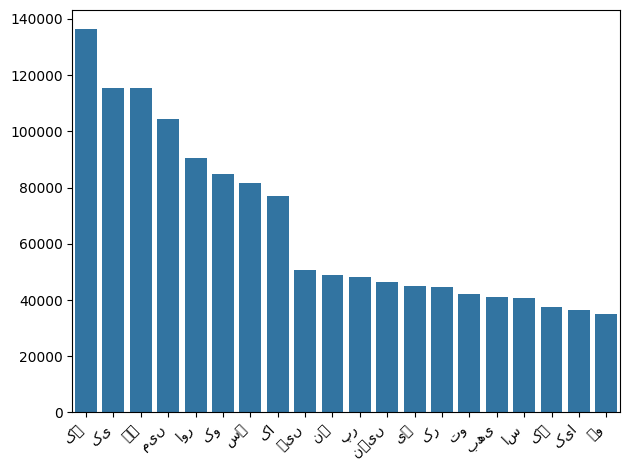

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

# Assuming 'tweets' is a list containing your preprocessed Urdu text

# Preprocess text (optional, adjust based on your cleaning needs)
def preprocess_urdu_text(text):
  # Lowercase conversion
  text = text.lower()
  # Remove punctuation (consider Urdu-specific punctuation if needed)
  import string
  urdu_punc = string.punctuation + '،۔\!\"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~'  # Add Urdu punctuation
  text = ''.join([char for char in text if char not in urdu_punc])
  # Handle other normalization steps (e.g., diacritics) if necessary
  return text

tweets = [preprocess_urdu_text(tweet) for tweet in tweets]

# Flatten the list of tokenized tweets into a single list of words
all_words = []
for tweet in tweets:
    all_words.extend(tweet.split())  # Tokenize each tweet and add words to the list

counter = Counter(all_words)  # Count word frequencies in the combined list
most_common_words = counter.most_common(20)  # Get the top 20 most frequent words

# Extract words and counts
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Set Urdu font
import matplotlib.font_manager as fm

# Adjust the font path based on your Urdu font installation
# urdu_font = fm.FontManager().add_font('/path/to/your/urdu_font.ttf')
# plt.xlabel("Word", font=urdu_font)
# plt.ylabel("Count", font=urdu_font)
# plt.title("Most Frequent Words in Urdu Tweets (Top 20)", font=urdu_font)

# Create Seaborn plot
sns.barplot(x=words, y=counts)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# This function removes all punctuations from the tokens

def removingPunctuation(text):
    arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
    # englishPunctuations = string.punctuation # importing English punctuation marks
    # englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
    punctuationsList = arabicPunctuations  # creating a list of all punctuation marks
    cleanTweet = ''
    for i in text:
      if i not in arabicPunctuations:
        cleanTweet = cleanTweet + '' + i
    return cleanTweet

tokenFiltered = []
for i in tweets:
  token = removingPunctuation(i)
  tokenFiltered.append(token)

In [25]:
# This function creates a bar chart of the most frequent 20 tokens

import plotly.offline as po
from plotly.offline import iplot
import plotly.graph_objs as go

freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])


def topTokensBarchart(df):
  y = freq_df['count']

  data = [go.Bar ( x = freq_df.token, y = y, name = 'Most Common Tokens in the Dataset')]
  layout = go.Layout(title = 'Most Common Tokens in the Dataset', xaxis_title="Tokens",
      yaxis_title="Counts")
  fig = go.Figure(data = data, layout = layout)
  po.plot(fig)

  # the graph will be find in html format in the temp folder

  fig.show()


topTokensBarchart(freq_df)

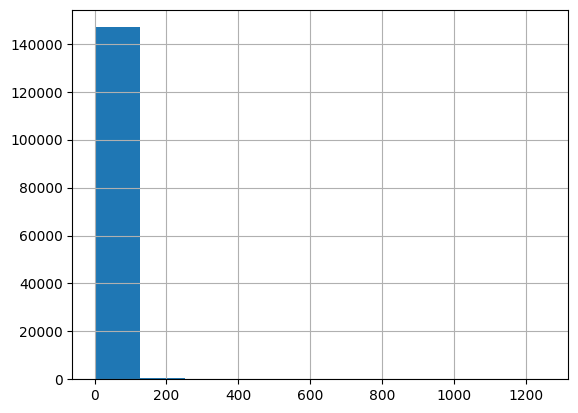

In [ ]:
# This function draw a histogram for the length of tweets based on  the number of tokens per tweet

def tokenPerTweetHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

tokenPerTweetHistogram(df['tokenized_text'])

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


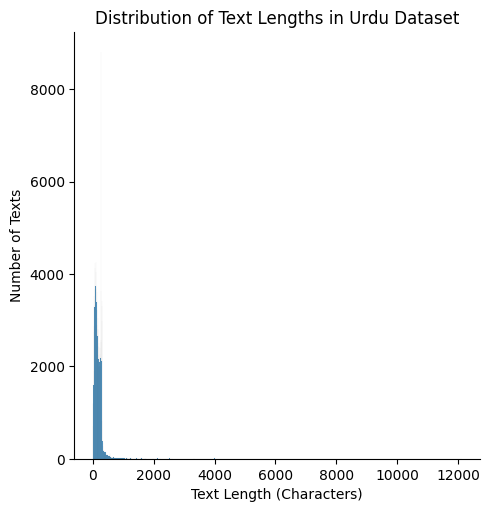

In [ ]:
sns.displot(df['text'].str.len())
plt.xlabel("Text Length (Characters)")
plt.ylabel("Number of Texts")
plt.title("Distribution of Text Lengths in Urdu Dataset")
plt.show()


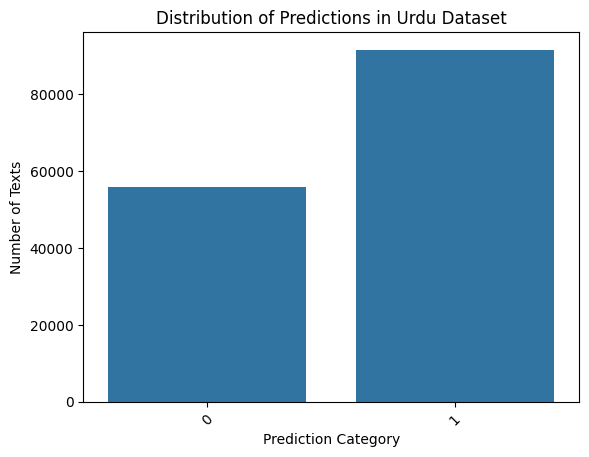

In [20]:
sns.countplot(x="prediction", data=df)
plt.xlabel("Prediction Category")
plt.ylabel("Number of Texts")
plt.title("Distribution of Predictions in Urdu Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



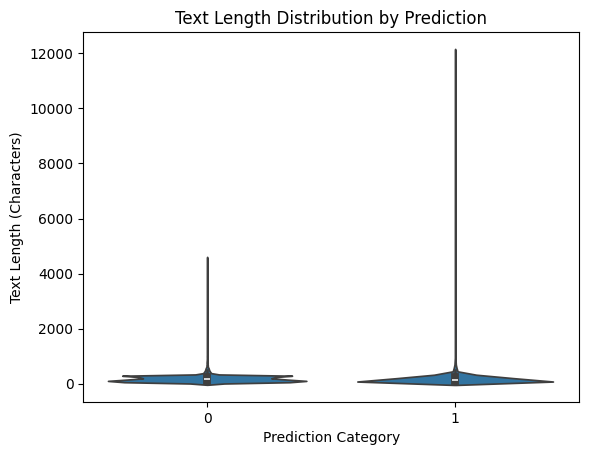

In [ ]:
# Calculate the length of text in the 'text' column and store in a new column
df['text_length'] = df['text'].str.len()

# Now use this new column for the violin plot
sns.violinplot(x="prediction", y="text_length", data=df)
plt.xlabel("Prediction Category")
plt.ylabel("Text Length (Characters)")
plt.title("Text Length Distribution by Prediction")
plt.show()